# P P1. Regresión
## Luis Enrique Garcia Gallegos
### **Matricula**: 649247
En este proyecto estarás trabajando con datos de tu interés, ya sea que los descargues de alguna base de datos pública o que los hayas generado por tu cuenta. Desarrolla los siguientes puntos en una *Jupyter Notebook*, de forma que se genere un reporte 
fácilmente comprensible, intepretable y replicable, con información para el lector descrita en formato de markdown. Indica claramente de dónde descargaste los datos, y los objetivos específicos que se desean alcanzar con el proyecto (e.g. identificar si a partir de información relacionada a la calidad del aire puedo predecir la temperatura, y caracterizar la relación que existe entre la cantidad de partículas pm25 y la temperatura).

1. Importa los datos a tu ambiente de trabajo. Describe características de tu base de datos, imprimiendo en consola y graficando información relevante. Por ejemplo: cantidad de observaciones, cantidad de variables, tipo de variables, nombre de variables, identificación de la respuesta de interés, etc. Asegúrate de que tus variables tengan un nombre fácilmente interpretable. En caso contrario, adjunta también un diccionario, un archivo .docx, .xlsx, .pdf, .csv, etc. donde se describa cada variable (por ejemplo: var1. Peso medido en gramos, var2. Diámetro medido en centímetros). Explica claramente qué de esta información te permitió suponer que realizar una regresión lineal pudiera ser una buena solución y/o por qué supones que otro método sería una mejor opción. **Información sobre cada columna ->** [EXCEL](Descriptor_indicadores_ECEG_Seccion_2020.csv).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as st
import mlxtend.feature_selection as mlx
import random
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor  # Usa KNeighborsClassifier si es clasificación
from sklearn.metrics import mean_squared_error  # Usa accuracy_score si es clasificación
BaseDeDatos=pd.read_csv('INE_SECCION_2020.csv')
print("Dimensiones de los datos: ",BaseDeDatos.shape, "\nNombres de las variables: ", BaseDeDatos.columns)
BaseDeDatos.head(5)

Dimensiones de los datos:  (68806, 226) 
Nombres de las variables:  Index(['ID', 'ENTIDAD', 'DISTRITO', 'MUNICIPIO', 'SECCION', 'TIPO', 'POBTOT',
       'POBFEM', 'POBMAS', 'P_0A2',
       ...
       'VPH_TELEF', 'VPH_CEL', 'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI',
       'VPH_CVJ', 'VPH_SINRTV', 'VPH_SINLTC', 'VPH_SINCIN', 'VPH_SINTIC'],
      dtype='object', length=226)


,ID,ENTIDAD,DISTRITO,MUNICIPIO,SECCION,TIPO,POBTOT,POBFEM,POBMAS,P_0A2,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCIN,VPH_SINTIC
0,118,1,3,1,1,2,2564,1360,1204,36,...,698,740,738,659,615,288,2,1,12,1
1,122,1,3,1,2,2,889,462,427,27,...,173,253,195,164,145,54,4,20,72,2
2,128,1,3,1,3,2,2003,1057,946,56,...,426,621,559,360,335,184,10,4,74,1
3,137,1,3,1,4,2,1636,880,756,40,...,311,507,456,330,329,147,10,11,61,1
4,138,1,3,1,5,2,808,445,363,14,...,188,256,233,168,119,70,4,0,30,0


Se tomaron los datos del INEGI de su base de datos para el publico, específicamente de **Estadísticas censales a escalas geoelectorales (2020)**, dicho aparto era una archivo *ZIP*, en el que venia mucha información, solamente se tomaron los arvichos adjuntos ([Descripción de columnas de la base de datos](Descriptor_indicadores_ECEG_Seccion_2020.csv), [Base de datos](INE_SECCION_2020.csv), [CLASIFICACIONES DEL CENSO DE POBLACIÓN Y VIVIENDA 2020](702825198701.pdf)).

2. Aplica soluciones para al menos tres de los cinco problemas típicos que se describieron en la presentación C1.5. Demuestra las modificaciones que se le realizaron a la base de datos, imprimiendo en consola información relevante, y explica por qué se realizaron. Por ejemplo: para el caso de variables cualitativas, podrías imprimir la cantidad y los nombres de las variables antes de aplicar la solución, y la cantidad y los nombres de las variables después de aplicar la solución. 

In [2]:
datos=BaseDeDatos.drop(columns=['ID', 'DISTRITO', 'MUNICIPIO', 'SECCION', 'POBFEM', 'POBMAS', 'VPH_SINTIC', 'VPH_SINCIN', 'VPH_SINLTC', 'VPH_CVJ', 'VPH_SINRTV', 'VPH_SPMVPI', 'VPH_STVP', 'VPH_CEL', 'VPH_TELEF', 'VPH_INTER', 'VPH_PC', 'VPH_RADIO', 'VPH_TV', 'VPH_BICI', 'VPH_MOTO', 'VPH_AUTOM', 'VPH_HMICRO', 'VPH_LAVAD', 'VPH_REFRI', 'VPH_SNBIEN', 'VPH_NDACMM', 'VPH_DSADMA', 'VPH_NDEAED', 'VPH_C_SERV', 'VPH_NODREN', 'VPH_DRENAJ', 'VPH_LETR', 'VPH_EXCSA', 'VPH_CISTER', 'VPH_TINACO', 'VPH_AEASP', 'VPH_AGUAFV', 'VPH_AGUADV', 'VPH_S_ELEC', 'VPH_C_ELEC', 'VPH_3YMASC', 'VPH_2CUART', 'VPH_1CUART', 'VPH_2YMASD', 'VPH_1DOR', 'VPH_PISOTI', 'VPH_PISODT', 'PRO_OCUP_C', 'PROM_OCUP', 'OCUPVIVPAR', 'VIVPAR_UT', 'VIVPAR_DES', 'TVIVPARHAB', 'VIVPARH_CV', 'VIVPAR_HAB', 'TVIVPAR', 'TVIVHAB', 'VIVTOT', 'PHOGJEF_M', 'PHOGJEF_F', 'POBHOG', 'HOGJEF_M', 'HOGJEF_F', 'TOTHOG', 'P12YM_SEPA', 'P12YM_CASA', 'P12YM_SOLT', 'PAFIL_OTRA', 'PAFIL_IPRI', 'PDER_IMSSB', 'PDER_SEGP', 'PAFIL_PDOM', 'PDER_ISTEE', 'PDER_ISTE', 'PDER_SS', 'PDER_IMSS', 'PSINDER', 'PDESOCUP_M', 'PDESOCUP_F', 'PDESOCUP', 'POCUPADA_M', 'POCUPADA_F', 'POCUPADA', 'PE_INAC_M', 'PE_INAC_F', 'PE_INAC', 'PEA_M', 'PEA_F', 'PEA', 'GRAPROES_M', 'GRAPROES_F', 'GRAPROES', 'P18YM_PB_M', 'P18YM_PB_F', 'P15SEC_COM', 'P15SEC_COF', 'P15SEC_INM', 'P15SEC_INF', 'P15PRI_COM', 'P15PRI_COF', 'P15PRI_INM', 'P15PRI_INF', 'P15YM_SE_M', 'P15YM_SE_F', 'P15YM_AN_F', 'P15YM_AN_M', 'P8A14AN_M', 'P8A14AN_F', 'P18A24A_M', 'P18A24A_F', 'P15A17A_F', 'P15A17A_M', 'P12A14NOAM', 'P12A14NOAF', 'P6A11_NOAM', 'P6A11_NOAF', 'P3A5_NOA_M', 'P3A5_NOA_F', 'PSIND_LIM', 'PCLIM_PMEN', 'PCLIM_RE_C', 'PCLIM_MOT2', 'PCLIM_OAUD', 'PCLIM_HACO', 'PCLIM_VIS', 'PCLIM_CSB', 'PCON_LIMI', 'PCDISC_MEN', 'PCDISC_M_A', 'PCDISC_AUD', 'PCDISC_LEN', 'PCDISC_VIS', 'PCDISC_MOT', 'PCON_DISC', 'POB_AFRO_M', 'POB_AFRO_F', 'POB_AFRO', 'PHOG_IND', 'P5_HLI_HE', 'P5_HLI_NHE', 'P5_HLI', 'P3HLI_HE_M', 'P3HLI_HE_F', 'P3HLI_HE', 'P3HLINHE_M', 'P3HLINHE_F', 'P3HLINHE', 'P3YM_HLI_M', 'P3YM_HLI_F', 'P3YM_HLI', 'PRESOE15_M', 'PRESOE15', 'PRESOE15_F', 'PRES2015_M', 'PRES2015_F', 'PRES2015', 'PNACOE_M', 'PNACOE_F', 'PNACOE', 'PNACENT_M', 'PNACENT_F', 'PNACENT', 'PROM_HNV', 'POB_EDADNE', 'POB65_MAS', 'POB15_64', 'POB0_14', 'REL_H_M', 'P_60YMAS_M', 'P_60YMAS_F', 'P_60YMAS', 'P_15A49_F', 'P_18A24_M', 'P_18A24_F', 'P_18A24', 'P_15A17_M', 'P_15A17_F', 'P_15A17', 'P_12A14_M', 'P_12A14_F', 'P_12A14', 'P_8A14_M', 'P_8A14_F', 'P_8A14', 'P_6A11_M', 'P_6A11_F', 'P_6A11', 'P_3A5_M', 'P_3A5_F', 'P_3A5', 'P_18YMAS_M', 'P_18YMAS_F', 'P_18YMAS', 'P_15YMAS_M', 'P_15YMAS_F', 'P_15YMAS', 'P_12YMAS_M', 'P_12YMAS_F', 'P_12YMAS', 'P_5YMAS_M', 'P_5YMAS_F', 'P_5YMAS', 'P_3YMAS_M', 'P_3YMAS_F', 'P_3YMAS', 'P_0A17', 'P_0A2_M', 'P_0A2_F'])
print(f"Entidades en México\n{datos['ENTIDAD'].value_counts()}")
print(f"\nTipos (2. Urbana\t3. Mixta\t4. Rural)\n{datos['TIPO'].value_counts()}\t")
datos['RURAL']=datos['TIPO']//4
datos['MIXTA']=(datos['TIPO']//3)-datos['RURAL']
for i in range(32, 1, -1):
    name='ENTIDAD'+str(i)
    datos[name]=datos['ENTIDAD']//i
    existe=datos[name]*i
    datos['ENTIDAD']=datos['ENTIDAD']-existe
datos=datos.drop(columns=['TIPO', 'ENTIDAD'])
datos.head(5)

Entidades en México
ENTIDAD
15    6544
9     5535
30    4865
25    3765
14    3613
8     3195
11    3161
19    2818
16    2703
12    2685
21    2684
20    2479
7     2099
28    2017
2     2016
24    1793
32    1777
13    1762
5     1701
26    1528
10    1369
27    1144
31    1122
23    1038
18     968
17     914
22     891
1      622
29     612
4      532
3      484
6      370
Name: count, dtype: int64

Tipos (2. Urbana	3. Mixta	4. Rural)
TIPO
2    43815
4    18605
3     6386
Name: count, dtype: int64	


,POBTOT,P_0A2,P3A5_NOA,P6A11_NOA,P12A14NOA,P15A17A,P18A24A,P8A14AN,P15YM_AN,P15YM_SE,...,ENTIDAD11,ENTIDAD10,ENTIDAD9,ENTIDAD8,ENTIDAD7,ENTIDAD6,ENTIDAD5,ENTIDAD4,ENTIDAD3,ENTIDAD2
0,2564,36,8,5,0,98,203,2,4,6,...,0,0,0,0,0,0,0,0,0,0
1,889,27,9,6,4,26,46,3,21,18,...,0,0,0,0,0,0,0,0,0,0
2,2003,56,10,5,9,72,170,1,9,12,...,0,0,0,0,0,0,0,0,0,0
3,1636,40,17,3,5,50,158,1,18,16,...,0,0,0,0,0,0,0,0,0,0
4,808,14,4,3,0,34,66,1,5,3,...,0,0,0,0,0,0,0,0,0,0


Como esta base de datos incluye demasiada información, se descarto toda aquella que fuera referente a otro tema respecto a la educación y a la `ENTIDAD`, esto porque no lo senti relevante para este análisis de conocer la población de niños de entre 3 a 5 años de edad que no van a la escuela. Tanto la variable `TIPO` y `ENTIDAD`, son cualitativas  para el `TIPO` existen 3 categorías **2. Urbana**, **3. Mixta** y **4. Rural**, mientras que `ENTIDAD` hace referencia a los **32 estados de México**; considerando esto se crearon columnas binarias, por ejemplo si tenemos dos datos en `ENTIDAD` que fueran **10** y **11** y creáramos una columna que fuera `ENTIDAD11`, entonces nuestro datos pasarían **0** y **1**, respectivamente. Gran parte de este procesos fue logrado mediante la extension de VisualCode [Data Wrangler](https://marketplace.visualstudio.com/items?itemName=ms-toolsai.datawrangler), la cual permitió visualizar los datos y realizar operaciones básicas en las columnas facilitando la codificación y limpieza de los datos.

3. Realiza un proceso de selección de características. Puedes llevar a cabo una metodología de selección hacia adelante o eliminación hacia atrás, o incluso mezclarlas. También puedes utilizar un método de regularización. Evidencia tus resultados imprimiendo en consola la cantidad y los nombres de las variables antes y después del proceso de selección de características. Explica claramente por qué utilizaste la metodología empleada, así como alguna conclusión sobre los resultados de este proceso.

In [3]:
random.seed(0)
caliz, prueba=train_test_split(datos, train_size=0.8)
nC=caliz.shape[0]
mC=caliz.shape[1]
nP=prueba.shape[0]
mP=prueba.shape[1]
print("Datos de entrenamiento: ", caliz.shape, "\tDatos de prueba: ",prueba.shape, "\n\tTotal de datos: ", (nC+nP))
XC=caliz.drop('P3A5_NOA', axis=1)
YC=caliz['P3A5_NOA']
XP=prueba.drop('P3A5_NOA', axis=1)
YP=prueba['P3A5_NOA']
sfs=mlx.SequentialFeatureSelector(LinearRegression(), k_features=(30, (mP-1)), forward=False, scoring='r2', cv=10)
sfs.fit(XC,YC)
variables=sfs.k_feature_names_
print(f"Características:\n\t{caliz.columns}\nCaracterísticas seleccionadas:\n\t{variables}")
xAjustadoC=XC
xAjustadoP=XP
for i in range(len(variables)):
    xAjustadoC=xAjustadoC.drop(variables[i], axis=1)
borrar=xAjustadoC.columns
xAjustadoC=XC
for i in range(len(borrar)):
    xAjustadoC=xAjustadoC.drop(borrar[i], axis=1)
    xAjustadoP=xAjustadoP.drop(borrar[i], axis=1)

Datos de entrenamiento:  (55044, 48) 	Datos de prueba:  (13762, 48) 
	Total de datos:  68806
Características:
	Index(['POBTOT', 'P_0A2', 'P3A5_NOA', 'P6A11_NOA', 'P12A14NOA', 'P15A17A',
       'P18A24A', 'P8A14AN', 'P15YM_AN', 'P15YM_SE', 'P15PRI_IN', 'P15PRI_CO',
       'P15SEC_IN', 'P15SEC_CO', 'P18YM_PB', 'RURAL', 'MIXTA', 'ENTIDAD32',
       'ENTIDAD31', 'ENTIDAD30', 'ENTIDAD29', 'ENTIDAD28', 'ENTIDAD27',
       'ENTIDAD26', 'ENTIDAD25', 'ENTIDAD24', 'ENTIDAD23', 'ENTIDAD22',
       'ENTIDAD21', 'ENTIDAD20', 'ENTIDAD19', 'ENTIDAD18', 'ENTIDAD17',
       'ENTIDAD16', 'ENTIDAD15', 'ENTIDAD14', 'ENTIDAD13', 'ENTIDAD12',
       'ENTIDAD11', 'ENTIDAD10', 'ENTIDAD9', 'ENTIDAD8', 'ENTIDAD7',
       'ENTIDAD6', 'ENTIDAD5', 'ENTIDAD4', 'ENTIDAD3', 'ENTIDAD2'],
      dtype='object')
Características seleccionadas:
	('POBTOT', 'P_0A2', 'P6A11_NOA', 'P12A14NOA', 'P15A17A', 'P18A24A', 'P8A14AN', 'P15YM_AN', 'P15YM_SE', 'P15PRI_IN', 'P15PRI_CO', 'P15SEC_CO', 'P18YM_PB', 'RURAL', 'MIXTA', 'ENTIDAD

Se uso una semilla para mantener un punto fijo a la hora de hacer una partición de datos entre prueba y entrenamiento, en el cual por gusto propio decidí hacer una partición de $80%$ para entrenamiento y el resto para las pruebas. Se opto por llevar una metodología de selección de características hacia atrás, ya que existen muchas variables *dummies* por lo que si vamos hacia adelante, vamos a tener que hacer más iteraciones, si bien yo fije un aproximado de cuantas variables voy a usar esto es con el fin de limitar el tiempo de cálculos, no obstante se uso validación cruzada.

4. Genera un modelo de regresión lineal y al menos uno no lineal, para predecir una variable de interés; explica con detalle por qué seguiste los pasos mostrados en tu código para generar el modelo, en aras de obtener la mejor predicción y resultados generalizables. Imprime en consola los coeficientes estimados al entrenar el modelo, e indica para cuáles de ellos puedes afirmar que existe una asociación significativa con la respuesta, y el por qué de tu aseveración. 

In [4]:
modeloML=sm.OLS(YC, sm.add_constant(xAjustadoC))
resultadosML=modeloML.fit()
resumenML=resultadosML.summary()
print(resumenML)
scaler = StandardScaler()
xAjustadoCKNN=scaler.fit_transform(xAjustadoC)
xAjustadoPKNN=scaler.transform(xAjustadoP)
mse_scores={}
for k in range(1, 101):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(xAjustadoCKNN, YC)
    y_pred=knn.predict(xAjustadoPKNN)
    mse_scores[k]=mean_squared_error(list(YP), y_pred)
best_k=min(mse_scores, key=mse_scores.get)
modeloKNN=KNeighborsRegressor(n_neighbors=best_k)
modeloKNN.fit(xAjustadoCKNN, YC)
print(knn.get_params())

                            OLS Regression Results                            
Dep. Variable:               P3A5_NOA   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 2.175e+04
Date:                Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:45:57   Log-Likelihood:            -2.2240e+05
No. Observations:               55044   AIC:                         4.449e+05
Df Residuals:                   55001   BIC:                         4.453e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0743      0.184      5.844      0.0

Como tenemos más de una variables no se podría utilizar un modelo de regresión lineal simple por lo que se usa el modelo de regresión lineal multiple. Asi mismo como tenemos más de una variable no sabemos que forma tendría función, por lo que un modelo KNN seria una manera de tener un modelo no lineal. Si analizamos el `summary()` del modelo lineal, veremos que tenemos una $R^2$ de **0.943**, el cual es bastante bueno, en cuanto a los **p-values** la mayoría son menores a **0.05**, no obstante hay algunos que superan estos valores, esto se puede deber a que existan pocos datos de esa columna por lo que en la mayoría de los casos no influye en el modelo.

5. Calcula al menos una métrica de error y una del nivel de linealidad del modelo, con la intención de que ambas métricas representen el funcionamiento esperado del modelo para cualquier dato que se le presente. Agrega un comentario que describa en palabras sencillas el significado de los mismos. 

In [5]:
estimacionML=resultadosML.predict(sm.add_constant(xAjustadoP))
estimacionKNN=modeloKNN.predict(xAjustadoPKNN)
mseKNN=mean_squared_error(estimacionKNN, YP)
mseML=mean_squared_error(estimacionML, YP)
print(f"MSE KNN: {round(mseKNN)}\tMSE regresión lineal multiple: {round(mseML)}")

MSE KNN: 233	MSE regresión lineal multiple: 189


Con los **MSE** de cada modelo podemos ver que tanto varían nuestros resultados entre lo previsto y lo real, como estamos prediciendo la población, entonces estos valores deben de ser enteros. Como ambos modelos tienen similares **MSE** si tomamos como referencia que la población más alta de niños de 3 a 5 años esta por los **1200**. Por lo tanto ambos modelos se adaptan bien a los datos.

6. Genera un modelo de regresión lineal o no lineal (del mismo tipo que el que haya obtenido el mejor desempeño en los puntos anteriores), pero para realizar un análisis de inferencia. A partir del mismo, realiza una o varias inferencias sobre los datos, asegurándote de incluir márgenes de error para tus conclusiones.

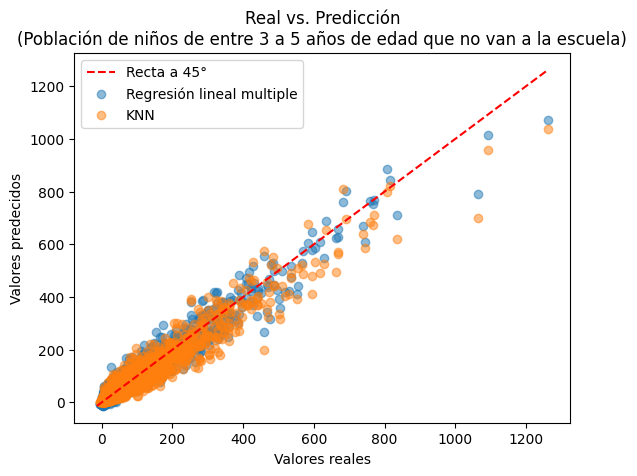

In [6]:
min_val=min(min(estimacionML), min(estimacionKNN), min(YP))
max_val=max(max(estimacionML), max(estimacionKNN), max(YP))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
plt.scatter(YP, estimacionML, alpha=0.5)
plt.scatter(YP, estimacionKNN, alpha=0.5)
plt.title('Real vs. Predicción\n(Población de niños de entre 3 a 5 años de edad que no van a la escuela)')
plt.xlabel("Valores reales")
plt.ylabel("Valores predecidos")
plt.legend(["Recta a 45°", "Regresión lineal multiple", "KNN"])
plt.show()

Se gráfico las predicciones de ambos modelos ya que al tener un **MSE** similar las predicciones serian similares, mediante ayuda de ChatGPT se logro graficar una recta a $45°$ la cual nos permitirá ver que tan buenas predicciones se hicieron con los datos de prueba.

7. (Opcional, valor de 10 puntos extra, solamente válido si utilizaste datos de __[https://www.inegi.org.mx/datosabiertos/](https://www.inegi.org.mx/datosabiertos/)__)
<figure>
    <center> <img src="Evidencia.jpeg" ></center>
</figure>
Crea una presentación corta (aproximadamente 5 slides), y expón al grupo la metodología y resultados obtenidos, como si estuvieras presentando resultados a una entidad responsable de resolver problemáticas sociales. Sube la presentación en la bandeja de Blackboard junto con el resto de los documentos.

**Firma de Honor:** Doy mi palabra que he realizado esta actividad con integridad académica